In [7]:
import karstnet as kn
import networkx as nx

# Import and cleaning function for Therion SQL import

This function ```from_therion_sql_enhanced```
1. Loads all the data from Therion sql, 
2. add flags on shots and stations,
3. regroupe nodes with same exact geographic coordinates,
4. rename nodes
5. returns a networkx graph.

The functions ```add_edges```, ```flag_nodes```, ```flag_edges```, ```remove_flagged_edges```:
1. enable to create edges and add manual flags on both edges and nodes
2. remove nodes with srf, dpl, rmv, art, or spl flags and add flagged add edges

The karstnet Kgraph object is created with the kn function ```from_nxGraph```  (!!! all the properties created with the function ```from_therion_sql_enhanced``` are lost when importing into the Kgraph object)


# Simple import example with Cave Rêve Eveillé

# Clean and add flags

It is possible to create edges and import flags on the nodes or edges.
1. To create one or multiple edges, create dictionnary with the flag as key, and a list of list of node id as values.
    - To create edges that should stay on the graph, use the flag 'add', or any other flags that are not 
    - If the flags : 'srf', 'dpl', 'rmv', 'art', 'spl' are use then they will be, by default removed from the graph
2. To add a node flag, create a dictionnary with the flag as key, and a list of node id to flag.
2. If the edge or node already exist, then a flag will be added edge or node

the node id are the full address, which is the full path describing the station in the sql file. this full address can be found in the  ```fulladdress``` dictionnary attached to the graph

### Flags

Therion node (station) flags: 
- ```ent``` = entrance
- ```con``` = continuation
- ```fix``` = fixed 
- ```spr``` = spring
- ```sin``` = sink
- ```dol``` = doline
- ```dig``` = dig 
- ```air``` = air-draught
- ```ove``` = overhang
- ```arc``` = arch attributes  

Therion edge (shot) flags:
- ```dpl``` = duplicate
- ```srf``` = surface shots 

Other edge flags:
- ```add``` = add
- ```rmv``` = remove
- ```art``` = artificial (ex. tunnel)
- ```spl``` = splay (for example star shape shots in large rooms)

# Example with the Slovenian cave Migovec dataset, 
Survey data reference: ICCC, & JSDPT. (2024). Survey Data for the Tolminski Migovec Cave Exploration project (Version 2024.03.13) [Dataset]. Zenodo. https://doi.org/DOI: 10.5281/ZENODO.108130

In [8]:
#load graph graph data
G = kn.from_therion_sql_enhanced('../data/Migovec.sql',
                                cavename = 'Migovec', 
                                crs = 'epsg:3912', 
                                rights = 'CC-BY-NC-SA 4.0',
                                citation = 'ICCC, & JSDPT. (2024). Survey Data for the Tolminski Migovec Cave Exploration project (Version 2024.03.13) [Dataset]. Zenodo. https://doi.org/DOI: 10.5281/ZENODO.108130')


Therion Import -- Importing all links (including splays) -- 0.4792978763580322s
Therion Import -- Importing all nodes data (including splays) -- 0.5018997192382812s
Therion Import -- Create initial graph with all the data points (including splays) -- 0.5770606994628906s
Therion Import -- Combine Stations with identical x,y,z -- 0.7804543972015381s
0/7294 unique positions
1000/7294 unique positions
2000/7294 unique positions
3000/7294 unique positions
4000/7294 unique positions
5000/7294 unique positions
6000/7294 unique positions
7000/7294 unique positions
Therion Import -- Rename nodes -- 10.249723434448242s
0/7294 nodes to rename
1000/7294 nodes to rename
2000/7294 nodes to rename
3000/7294 nodes to rename
4000/7294 nodes to rename
5000/7294 nodes to rename
6000/7294 nodes to rename
7000/7294 nodes to rename
Therion Import -- concatenate old ic in a dictionnary -- 10.313060998916626s
Therion Import -- Relabel nodes -- 10.314060926437378s
Therion Import -- remove self links -- 10.3960

## Example: Clean graph from duplicates and surface points flagged in the Therion sql file.

In [9]:
# clean flagged edges
H= G.copy()
kn.remove_flagged_edges(H) # in this case, removing the flagged duplicate and surface points disconnected parts from each other
print(f'Initial Graph size: {len(G)}, Graph size after removing flagged edges: {len(H)}')
# Kg = kn.from_nxGraph(H, dict(H.nodes('pos')), properties=None, verbose=True)

# Kg.plot()

Initial Graph size: 7294, Graph size after removing flagged edges: 6977


<!-- ## Example: Adding flags on edges and creating new edes -->

## Example: Adding flags on the edges
if the edges flagged does not exist, the function creates the edge

In [10]:
import karstnet as kn
flagged_edges = {'add': [  ['system_migovec.vrtnarija_vilinska.vrtnarija.xanadont.2','system_migovec.vrtnarija_vilinska.vrtnarija.cuckoos_nest.35'],
                                    ['system_migovec.vrtnarija_vilinska.vrtnarija.highway32.12','system_migovec.vrtnarija_vilinska.vrtnarija.gravity.2'],
                                    ['system_migovec.m2m16m18.M16.glory.5','system_migovec.m2m16m18.M16.god.27'],
                                    ['system_migovec.m2m16m18.M16.god.19','system_migovec.m2m16m18.M16.glory.11'],
                                    ['system_migovec.primadona_ubend_mona_tip.mona_tip.mona_tip2.31', 'system_migovec.primadona_ubend_mona_tip.mona_tip.cloacamaxima.49'],
                                    ['system_migovec.m2m16m18.M16.glory.16','system_migovec.m2m16m18.M16.god.15'],
                                    ['system_migovec.m2m16m18.M16.teotihuacan.13','system_migovec.m2m16m18.M16.god.17'],
                                    ['system_migovec.vrtnarija_vilinska.vrtnarija.keti.8','system_migovec.vrtnarija_vilinska.vrtnarija.intravenus_de_milo.1'],
                                    ['system_migovec.vrtnarija_vilinska.vrtnarija.kill_em_all.12','system_migovec.vrtnarija_vilinska.vrtnarija.metal_aven.10'],
                                    ['system_migovec.vrtnarija_vilinska.vilinska.vilcon.4','system_migovec.vrtnarija_vilinska.vrtnarija.judge.8'],
                                    ['system_migovec.vrtnarija_vilinska.vrtnarija.perfidia.14','system_migovec.vrtnarija_vilinska.vrtnarija.cow.1'],
                                    ['system_migovec.vrtnarija_vilinska.vrtnarija.perfidia.7','system_migovec.vrtnarija_vilinska.vrtnarija.republica.16'],
                                    ['system_migovec.primadona_ubend_mona_tip.primadona.polnoletna.26','system_migovec.primadona_ubend_mona_tip.primadona.milanova.8'],
                                    ['system_migovec.primadona_ubend_mona_tip.primadona.entirely_my_fault.16','system_migovec.primadona_ubend_mona_tip.primadona.karstaway.7'],
                                    ['system_migovec.primadona_ubend_mona_tip.primadona.more_like_welding.3','system_migovec.primadona_ubend_mona_tip.primadona.mfi.3'],
                                    ['system_migovec.primadona_ubend_mona_tip.primadona.TTTr.3','system_migovec.primadona_ubend_mona_tip.primadona.what_a_coincidence.1'],
                                    ['system_migovec.primadona_ubend_mona_tip.primadona.ajdovscina.1','system_migovec.primadona_ubend_mona_tip.primadona.TTTr.8'],
                                    ['system_migovec.primadona_ubend_mona_tip.primadona.milanova.9','system_migovec.primadona_ubend_mona_tip.primadona.polnoletna.26'],
                                    ['system_migovec.primadona_ubend_mona_tip.primadona.poseidon_rift.6','system_migovec.primadona_ubend_mona_tip.primadona.street-wise_hercules.8'],
                                    ['system_migovec.primadona_ubend_mona_tip.primadona.sweet_baby_jesus.22','system_migovec.primadona_ubend_mona_tip.primadona.hallelujah.1'],
                                    ['system_migovec.primadona_ubend_mona_tip.primadona.upotyn.8','system_migovec.primadona_ubend_mona_tip.primadona.plumbers_paradise.24'],
                                    ['system_migovec.primadona_ubend_mona_tip.primadona.plumbers_paradise.25','system_migovec.primadona_ubend_mona_tip.primadona.fenestrator.8'],
                                    ['system_migovec.primadona_ubend_mona_tip.primadona.apple_crumble.22','system_migovec.primadona_ubend_mona_tip.primadona.pov.15'],
                                    ['system_migovec.primadona_ubend_mona_tip.primadona.dejavu.1','system_migovec.primadona_ubend_mona_tip.primadona.zima00.17'],
                                    ['system_migovec.primadona_ubend_mona_tip.primadona.jack_of_hearts.29','system_migovec.primadona_ubend_mona_tip.primadona.smer0.37'],
                                    ['system_migovec.primadona_ubend_mona_tip.primadona.pivnica_resurvey.12','system_migovec.primadona_ubend_mona_tip.primadona.zima00.3']],
                              'rmv': [['system_migovec.vrtnarija_vilinska.vrtnarija.xanadont.2','system_migovec.vrtnarija_vilinska.vrtnarija.xanadont.1'],
                                    ['system_migovec.primadona_ubend_mona_tip.mona_tip.mona_tip2.35','system_migovec.primadona_ubend_mona_tip.mona_tip.cloacamaxima.45'],
                                    ['system_migovec.primadona_ubend_mona_tip.mona_tip.cloacamaxima.45','system_migovec.primadona_ubend_mona_tip.mona_tip.cloacamaxima.46'],
                                    ['system_migovec.primadona_ubend_mona_tip.mona_tip.cloacamaxima.46','system_migovec.primadona_ubend_mona_tip.mona_tip.cloacamaxima.47']]}


# this function add flags on edges. if the edge does not exist, it creates it
I = G.copy()
kn.flag_edges(I, flagged_edges, dict_address = nx.get_node_attributes(I,'fulladdress'))
print(f'Graph size after flaggind edges and before removing: nodes={len(I)}, edges={I.size()}')
kn.remove_flagged_edges(I)

print(f'Initial Graph size: nodes={len(G)}, edges={G.size()}')
print(f'Graph size after removing flagged edges: nodes={len(H)}, edges={H.size()}') 
print(f'Graph size after flaggind edges: nodes={len(I)}, edges={I.size()}')
# Kg = kn.from_nxGraph(G, dict(G.nodes('pos')), properties=None, verbose=True)
Kg = kn.from_nxGraph(I, dict(I.nodes('pos')), properties=None, verbose=True)

Therion Import - adding manual edges flags: dict_keys(['add', 'rmv'])
add
rmv
Graph size after flaggind edges and before removing: nodes=7294, edges=7377
Initial Graph size: nodes=7294, edges=7353
Graph size after removing flagged edges: nodes=6977, edges=6992
Graph size after flaggind edges: nodes=6973, edges=7012

 This network contains  1  connected components



## Example: Adding flags on the nodes

Therion Import -- Importing all links (including splays) -- 0.04222989082336426s
Therion Import -- Importing all nodes data (including splays) -- 0.04222989082336426s
Therion Import -- Create initial graph with all the data points (including splays) -- 0.04222989082336426s
Therion Import -- Combine Stations with identical x,y,z -- 0.06078457832336426s
0/78 unique positions
Therion Import -- Rename nodes -- 0.061763763427734375s
0/78 nodes to rename
Therion Import -- concatenate old ic in a dictionnary -- 0.061763763427734375s
Therion Import -- Relabel nodes -- 0.061763763427734375s
Therion Import -- remove self links -- 0.061763763427734375s
Therion Import --add dictionnaries to graph -- 0.061763763427734375s
Therion Import -- add splays -- 0.061763763427734375s
Therion Import -- add fulladdress -- 0.06967544555664062s
Therion Import -- add flags
Therion Import -- add sql ids -- 0.14014124870300293s
Therion Import -- remove isolated nodes -- 0.14014124870300293s
Therion Import - adding

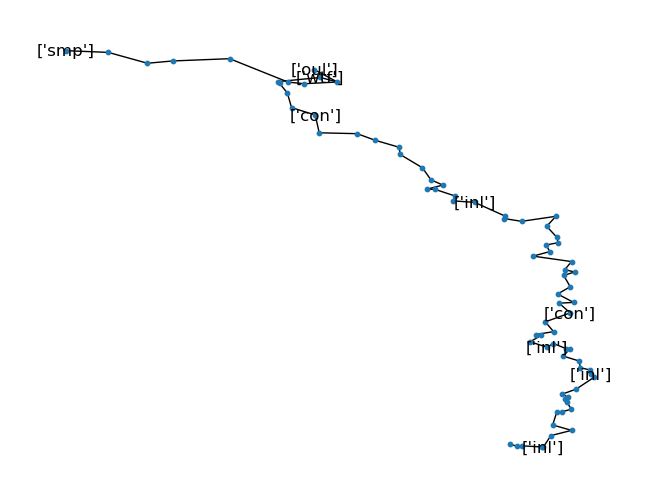

In [2]:

G = kn.from_therion_sql_enhanced('../data/ReveEveille.sql',
                                # optional input that are stored as metadata on the graph
                                cavename = 'ReveEveille', 
                                crs = 'local', 
                                rights = 'CC-BY-NC-SA 4.0',
                                citation = 'Centre Terre. (2024). Survey Data for the Ultima Patagonia Cave Exploration project [Dataset]. https://github.com/tr1813/ultima-patag')

flagged_nodes = {  'con': ['ReveEveille.cpff.23', 'ReveEveille.Suite.9'],
                    'inl': ['ReveEveille.CPF.4', 'ReveEveille.cpff.4', 'ReveEveille.cpff.38', 'ReveEveille.cpff.30'],
                    'oul': ['ReveEveille.Suite.16'],
                    'smp': ['ReveEveille.Suite.24'],
                    'wtf': ['ReveEveille.Suite.14']}


kn.flag_nodes(G, flagged_nodes, dict_address = nx.get_node_attributes(G,'fulladdress'))

labels = nx.get_node_attributes(G, 'flags') 
nx.draw(G,
        pos = kn.get_pos2d(G),
        labels = labels,
        node_size = 10)

